# 2.1.1 Dynamical Systems  #
  
      
Consider the ODE for a Hopf oscillator as decribed by wikipedia: [Hopf Bifurcation](https://en.wikipedia.org/wiki/Hopf_bifurcation)
$$\frac{dz}{dt}=z((\lambda +i)+b|z|^{2})$$  
which for simplicity we assume to have a frequency of oscillation equal to zero and a real-valued initial condition (i.e. no imaginary part), thus making the ODE be:
$$\frac{dz}{dt}=z(\lambda+b|z|^{2})$$  
This is a dynamical system with a vector function that is sufficiently smooth for its parameters $\lambda$ and $b$. A sample of the cases when $b, \lambda \in \mathbf{R}$ and $b < 0 $ are shown here:

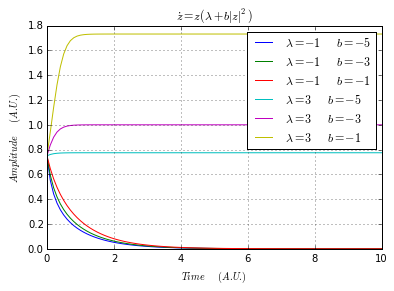

In [1]:
# prepared by Iran Roman (iran@stanford.edu)

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# this is the ODE we will integrate
def zdot(z, t, lda, b):    
    dzdt = z*(lda + b*abs(z)**2)
    return dzdt

# innitial condition and time vector
z0 = 0.75
t = np.linspace(0,10,101)

# iterate over different values from lambda and b 
# and visualize the function
for lda in np.linspace(-1,3,2):
    for b in np.linspace(-5,-1,3):

        sol = odeint(zdot, z0, t, args=(lda, b))

        plt.plot(t,sol,label = "$\lambda = %d \quad b = %d$" % (lda , b))
        plt.legend()

plt.title("$\dot{z}=z(\lambda+b|z|^{2})$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.xlabel("$Time \quad (A.U.)$")
plt.grid(True)           
plt.show()

## Flows ##
  
In the example above, the initial condition is set to be $0.75$ $(X_0 = 0.75)$. Since the function is suffiently smooth, any value of $t$ (time) could be considered a valid parameter to obtain the flow ($\Theta_t$) of the system.  
  
As a contrasting example, now consider the function:  
$$\dot{x} = 1 + x^2$$
If the initial condition is set to be zero $(X_0 = 0)$, we see that as the function grows exponentially as $t = \frac{\pi}{2}$ and is discontinuous immediatelly after when $t > \frac{\pi}{2}$. Thus the flow of this system is not defined at that point in time $(t = \frac{\pi}{2})$

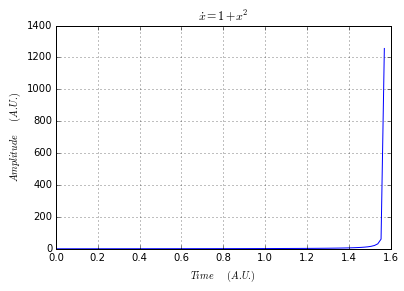

In [2]:
# this is the ODE we will integrate
def zdot(z, t):    
    dzdt = 1 + z**2
    return dzdt

# innitial condition and time vector
z0 = 0
t = np.linspace(0,1.570,101) # pi/2 ~ 1.5708

# iterate over different values from lambda and b 
# and visualize the function
sol = odeint(zdot, z0, t)

plt.plot(t,sol)
plt.title("$\dot{x} = 1 + x^2$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.xlabel("$Time \quad (A.U.)$")
plt.grid()
plt.show()

This is because the solution to the expression $\dot{x} = 1 + x^2$ with initial condition of $X_0 = 0$ is:  
$$x(t) = \tan(t)$$
which we know is not a perfectly smooth function.

## Orbit ##
A system's orbit is the flow for a period of time $t$ in an interval $\mathbf{I} \subset \mathbf{R}$ (thus $t \in \mathbf{I}$). The orbit assumes that during that period of time, the flow of the system is defined.

## Equivalence of Dynamical Systems ##

If two dynamical systems ($\dot{X}$ and $\dot{Y}$) are topologically equivalent, then there is a homeomorphism that transforms the orbit from one system ($\Theta_{t_1}(X)$) into an orbit from the other one ($\Psi_{t_2}(Y)$). This more formally is written as:  
$$h(\Theta_{t_1}(X)) = \Psi_{t_2}(h(X))$$  
  
As an example, consider again the Hopf bifurcation described before ($\dot{z}$) with parameters $\lambda = -10$ and $b=0$, and the first dynamical system described by [Math Insight](http://mathinsight.org/ordinary_differential_equation_introduction_examples) with original parameters modified:  
$$\dot{x}=-10x + 10$$  
  
Below the flow for both systems is graphed, with an arbitrarilly chosen initial condition of $x_0,z_0 = 0.5$, and a period of time going from $0$ to $2$. 

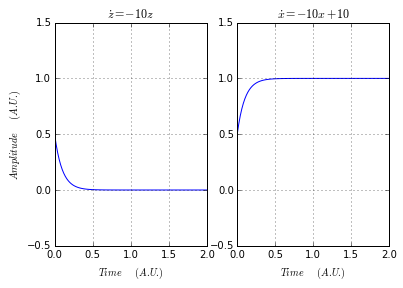

In [3]:
# hopf ODE
def zdot(z, t, lda, b):    
    dzdt = z*(lda + b*abs(z)**2)
    return dzdt
# with parameters:
l = -10
b = 0

# x_dot ODE
def xdot(x, t):    
    dxdt = -10*x + 10
    return dxdt

# innitial conditions and time vector
z0 = 0.5
x0 = 0.5
t = np.linspace(0,2,101)

# solve ODEs
sol_x = odeint(xdot, x0, t)
sol_z = odeint(zdot, z0, t, args=(l, b))

plt.subplot(1,2,1)
plt.plot(t,sol_z)
plt.title("$\dot{z}=-10z$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.ylim(-0.5,1.5)

plt.subplot(1,2,2)
plt.plot(t,sol_x)
plt.title("$\dot{x}=-10x + 10$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylim(-0.5,1.5)

plt.show()

In order to fulfill the relationship $h(\Theta_{t_1}(X)) = \Psi_{t_2}(h(X))$, we see that the homemorphism $h(\theta)$ for the plot above is:
$$h(\theta)= -\theta + 1$$
The figures below show how $h(\theta)$ transforms the orbit from one system to the other for all points in time, which makes this homeomorphism a conjugacy.

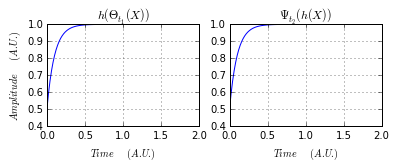

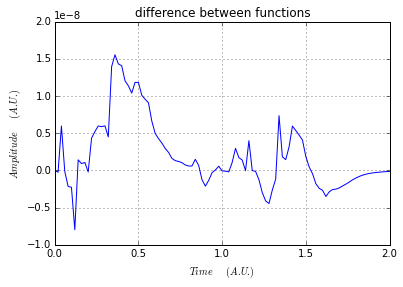

In [4]:
# define the homeomorphism
def h_hom(theta):
    out = -theta + 1
    return out

# hopf ODE
def zdot(z, t, lda, b):    
    dzdt = z*(lda + b*abs(z)**2)
    return dzdt 
# with parameters:
l = -10
b = 0

# x_dot ODE
def xdot(x, t):    
    dxdt = -10*x + 10 # condition for homeomorphism added
    return dxdt
    
# innitial conditions and time vector
z0 = 0.5
x0 = 0.5
t = np.linspace(0,2,101)

# solve fulfilling the left side of the equation
z = h_hom(odeint(zdot, z0, t, args=(l, b))) 
# solve fulfilling the right side of the equation
x = odeint(xdot, h_hom(x0), t)

plt.subplot(2,2,1)
plt.plot(t,z)
plt.title("$h(\Theta_{t_1}(X))$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")

plt.subplot(2,2,2)
plt.plot(t,x)
plt.title("$\Psi_{t_2}(h(X))$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.show()

plt.plot(t,x - z)
plt.title("difference between functions")
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.grid()
plt.show()

Considering the functions described above, if the initial condition is set to be different between functions, the homeomorphisms is no longer a conjugacy:

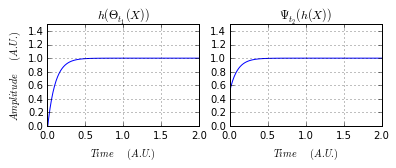

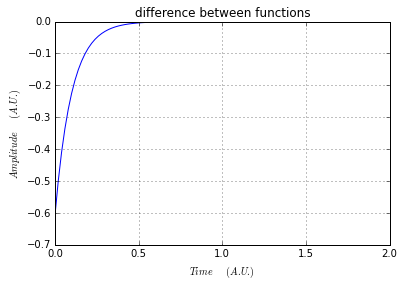

In [5]:
# define the homeomorphism
def h_hom(theta):
    out = -theta + 1
    return out

# hopf ODE
def zdot(z, t, lda, b):    
    dzdt = z*(lda + b*abs(z)**2)
    return dzdt 
# with parameters:
l = -10
b = 0

# x_dot ODE
def xdot(x, t):    
    dxdt = -10*x + 10 # condition for homeomorphism added
    return dxdt
    
# different innitial conditions
z0 = 1.11277042
x0 = 0.5

# time vector for the system
t = np.linspace(0,2,101)

# solve fulfilling the left side of the equation
z = h_hom(odeint(zdot, z0, t, args=(l, b))) 
# solve fulfilling the right side of the equation
x = odeint(xdot, h_hom(x0), t)

plt.subplot(2,2,1)
plt.plot(t,z)
plt.title("$h(\Theta_{t_1}(X))$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.ylim(0.0,1.5)

plt.subplot(2,2,2)
plt.plot(t,x)
plt.title("$\Psi_{t_2}(h(X))$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylim(0.0,1.5)
plt.show()

plt.plot(t,z - x)
plt.title("difference between functions")
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.grid()
plt.show()

However, the homeomorphisms still holds, but at different points in time for the functions with different initial conditions:

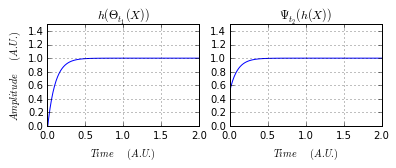

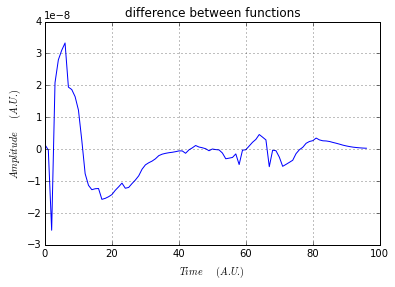

In [6]:
# define the homeomorphism
def h_hom(theta):
    out = -theta + 1
    return out

# hopf ODE
def zdot(z, t, lda, b):    
    dzdt = z*(lda + b*abs(z)**2)
    return dzdt 
# with parameters:
l = -10
b = 0

# x_dot ODE
def xdot(x, t):    
    dxdt = -10*x + 10 # condition for homeomorphism added
    return dxdt
    
# different innitial conditions
z0 = 1.11277042
x0 = 0.5

t = np.linspace(0,2,101)

# solve fulfilling the left side of the equation
z = h_hom(odeint(zdot, z0, t, args=(l, b))) 
# solve fulfilling the right side of the equation
x = odeint(xdot, h_hom(x0), t)

plt.subplot(2,2,1)
plt.plot(t,z)
plt.title("$h(\Theta_{t_1}(X))$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.ylim(0.0,1.5)

plt.subplot(2,2,2)
plt.plot(t,x)
plt.title("$\Psi_{t_2}(h(X))$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylim(0.0,1.5)
plt.show()

# the points in time where the homeomorphisms still holds
plt.plot(z[4:] - x[:-4])
plt.title("difference between functions")
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.grid()
plt.show()

## Structurally Stable Systems ##  

A system $\dot{X}$ is said to be structurally stable it there is a homeomorphism $h$ between $\dot{X} = F(X)$ and $\dot{X} = F(X) + \epsilon P(X)$, where both $F$ and $P$ are smooth, and $\epsilon << 1$.  
The example below illustrates this principle for the simplest homeomorphism (the identity): $h(\theta) = \theta$

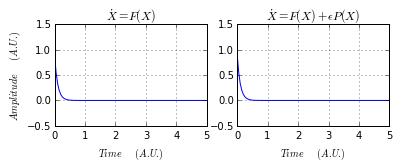

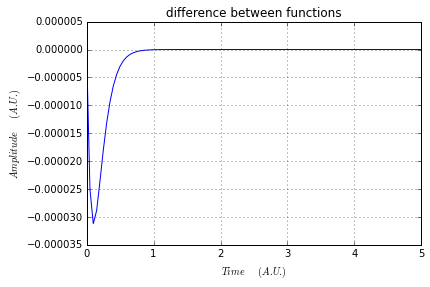

In [7]:
import numpy as np

# hopf ODE
def zdot(z, t, lda, b):    
    dzdt = z*(lda + b*abs(z)**2)
    return dzdt

def zdot_eps(z, t, lda, b, epsln):    
    dzdt = z*(lda + b*abs(z)**2) + epsln*np.sin(z)
    return dzdt

# with parameters:
l = -10
b = 0
epsln = 0.001

# innitial conditions and time vector
z0 = 0.9
t = np.linspace(0,5,101)

# define the homeomorphism
def h_hom(theta):
    out = theta
    return out

# solve ODEs
sol_z = h_hom(odeint(zdot, z0, t, args=(l, b)))
sol_z_eps = odeint(zdot_eps, h_hom(z0), t, args=(l, b, epsln))

plt.subplot(2,2,1)
plt.plot(t,sol_z)
plt.title("$\dot{X} = F(X)$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.ylim(-0.5,1.5)

plt.subplot(2,2,2)
plt.plot(t,sol_z_eps)
plt.title("$\dot{X} = F(X) + \epsilon P(X)$")
plt.grid()
plt.xlabel("$Time \quad (A.U.)$")
plt.ylim(-0.5,1.5)
plt.show()

plt.plot(t,sol_z - sol_z_eps)
plt.title("difference between functions")
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.grid()
plt.show()

The point-wise difference between these two functions shows that by time $1.0$, the behavior between the two is similar. Thus the homeomorphisms holds after that point in time:

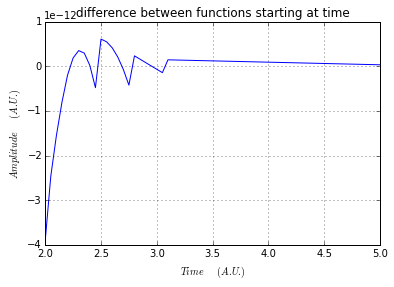

In [8]:
plt.plot(t[40:],sol_z[40:] - sol_z_eps[40:])
plt.title("difference between functions starting at time ")
plt.xlabel("$Time \quad (A.U.)$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.grid()
plt.show()

## Bifurcations ##